In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from astropy.time import Time, TimeDelta
from astropy.table import Table

import matplotlib.pylab as plt

In [3]:
from datetime import datetime, timedelta

In [26]:
N = []
comp = []
m_iter = []
duration = []
#with open('benchmark_log_250920_parsed', 'rb') as infile:
with open('numpy_benchmark_parall_1013_parsed', 'rb') as infile:    
    for line in infile:
        Nin, compin, m_iterin, *timein = line.strip().split()
        N.append(int(Nin))
        comp.append(int(compin))
        m_iter.append(int(m_iterin))
        #fix hour parsing
        if len(timein) == 2:
            time = datetime.strptime(b''.join(timein).decode(), '%Mmin%Ss')
        elif len(timein) == 3:
            time = datetime.strptime(b''.join(timein).decode(), '%Hh%Mmin%Ss')    
        else:
            time = datetime.strptime(b''.join(timein).decode(), '%dd%Hh%Mmin%Ss')    
        duration.append(timedelta(days=time.day, hours=time.hour, minutes=time.minute, seconds=time.second))


In [27]:
prof = Table({'N':N, 'components':comp, 'max_iterations':m_iter, 'time': TimeDelta(duration, format='datetime')})

In [28]:
def mask(comp, m_iter):
    return np.logical_and(prof['components'] == comp, prof['max_iterations'] == m_iter)

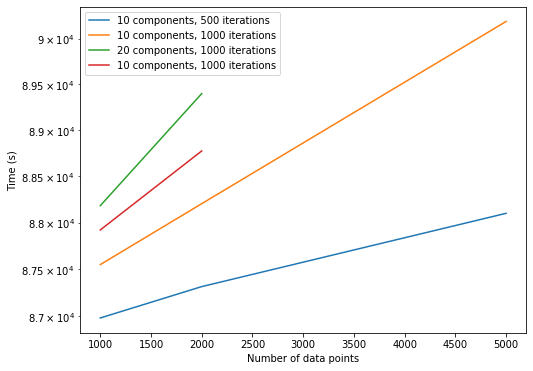

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(prof[mask(10, 500)]['N'], prof[mask(10, 500)]['time'].sec, label='10 components, 500 iterations')
ax.plot(prof[mask(10, 1000)]['N'], prof[mask(10, 1000)]['time'].sec, label='10 components, 1000 iterations')
ax.plot(prof[mask(20, 1000)]['N'], prof[mask(20, 1000)]['time'].sec, label='20 components, 1000 iterations')
ax.plot(prof[mask(15, 1000)]['N'], prof[mask(15, 1000)]['time'].sec, label='10 components, 1000 iterations')
ax.set_yscale('log')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Number of data points')
ax.legend()

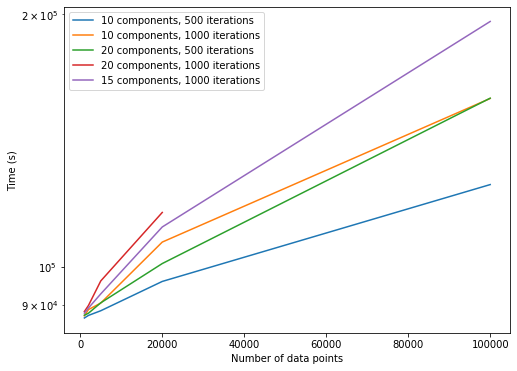

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(prof[mask(10, 500)]['N'], prof[mask(10, 500)]['time'].sec, label='10 components, 500 iterations')
ax.plot(prof[mask(10, 1000)]['N'], prof[mask(10, 1000)]['time'].sec, label='10 components, 1000 iterations')
ax.plot(prof[mask(20, 500)]['N'], prof[mask(20, 500)]['time'].sec, label='20 components, 500 iterations')
ax.plot(prof[mask(20, 1000)]['N'], prof[mask(20, 1000)]['time'].sec, label='20 components, 1000 iterations')
ax.plot(prof[mask(15, 1000)]['N'], prof[mask(15, 1000)]['time'].sec, label='15 components, 1000 iterations')

ax.set_yscale('log')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Number of data points')
ax.legend()

In [29]:
prof

N,components,max_iterations,time
int64,int64,int64,object
1000,5,500,"1 day, 0:04:53"
1000,5,1000,"1 day, 0:07:09"
1000,10,500,"1 day, 0:07:27"
1000,10,1000,"1 day, 0:16:05"
1000,15,500,"1 day, 0:13:50"
1000,15,1000,"1 day, 0:26:59"
1000,20,500,"1 day, 0:18:25"
1000,20,1000,"1 day, 0:33:14"
2000,5,500,"1 day, 0:08:28"
